# Pushing the phase-plane symmetries of the Lotka-Volterra model forward
*Written by:* Johannes Borgqvist,<br>
*Date:* 2022-08-18.<br>
In this script, we consider the phase plane ODE

\begin{equation}
\dfrac{\mathrm{d}v}{\mathrm{d}u}=\dfrac{\alpha v(u-1)}{u(1-v)}.
  \label{eq:LV_phase_plane}
\end{equation}
which has the following two non-trivial symmetries:
\begin{align}
  X_u&=\dfrac{1}{\alpha}\left(\dfrac{u}{u-1}\right)\partial_u,\label{eq:LV_u}\\
  X_v&=\dfrac{v}{1-v}\partial_v.\label{eq:LV_v}
\end{align}
Now, the full Lotka-Volterra model is given by 
\begin{equation}
  \begin{split}
    \dfrac{\mathrm{d}u}{\mathrm{d}\tau}&=u(1-v),\\
    \dfrac{\mathrm{d}v}{\mathrm{d}\tau}&=\alpha v(u-1),\\    
    \end{split}
  \label{eq:LV}
\end{equation}
and what we show in the paper is that the two non-trivial symmetries that we listed previously can be extended to two full symmetries acting on time as well as the states, i.e. mapping $(\tau,u(\tau),v(\tau))$ to another solution curve. These two unknown symmetries are generated by 
\begin{align}
  X_{\tau,u}&=\xi_{u}(\tau,u,v)\partial_\tau+\dfrac{1}{\alpha}\left(\dfrac{u}{u-1}\right)\partial_u,\label{eq:LV_u_full}\\
  X_{\tau,v}&=\xi_{v}(\tau,u,v)\partial_\tau+\dfrac{v}{1-v}\partial_v.\label{eq:LV_v_full}
\end{align}
and the two time infinitesimals $\xi_u$ and $\xi_v$ satisfy the following two PDEs
\begin{align}
  X_{\tau,u}:\quad u(1-v)\dfrac{\partial\xi_u}{\partial u}+\alpha v(u-1)\dfrac{\partial\xi_u}{\partial u}&=-\dfrac{u}{(u-1)^2},\label{eq:xi_u}\\
  X_{\tau,v}:\quad u(1-v)\dfrac{\partial\xi_v}{\partial u}+\alpha v(u-1)\dfrac{\partial\xi_v}{\partial u}&=+\dfrac{\alpha v}{(1-v)^2}\quad.\label{eq:xi_v}
\end{align}
In this notebook, we will find these two symmetries by solving the two PDEs above and then we will plot their action on solution curves to the full Lotka-Volterra model. 

The key for plotting their action is that we can express the infinitesimals $\xi_u$ and $\xi_v$ in terms of the Lambert W functions. In both cases, the time tangent will depend on the internal energy $H$ of a solution trajectory in the $(u,v)$-phase plane given by 
\begin{equation}
  H=\alpha u+v-\ln\left(u^\alpha v\right),\quad H=\alpha u_0+v_0-\ln\left(u_0^\alpha v_0\right)
  \label{eq:phase_trajectory_LV}
\end{equation}
where the initial conditions are denoted by $(u_0,v_0)$. Given this internal energy, the infinitesimal $\xi_u$ is given by 
\begin{equation}
  \begin{split}
    \xi_u(u)&=-\int_{u_{\min}}^{u}\dfrac{1}{(1+W_j(I(s)))(s-1)^2}\mathrm{d}s,\\
    I(s)&=-\left(\dfrac{\exp(s)}{s}\right)^{\alpha}\dfrac{1}{\exp(H)},
    \end{split}
  \label{eq:xi_u_final}
\end{equation}
where $W_j$ corresponds to the Lambert W function and $j=0,-1$ corresponds to the real branches of this function. Similarly, the infinitesimal $\xi_v$ is given by
\begin{equation}
  \begin{split}
    \xi_v(v)&=-\int_{v_{min}}^{v}\dfrac{1}{(W_j\left(I(s)\right)+1)(1-s)^2}\mathrm{d}s,\\
  I(s)&=-\dfrac{1}{\alpha}\left(\dfrac{\exp\left(s-H\right)}{\alpha s}\right)^{1/\alpha}.
\end{split}
  \label{eq:xi_v_final}
\end{equation}
So, we will try to solve these integrals numerically in order to plot the action of the respective symmetries. 

# Plotting the solutions of the Lotka-Volterra model and its symmetries
Ok, now we will move on and plot the solutions of the Lotka-Volterra model.
## Plot the solutions of the LV model

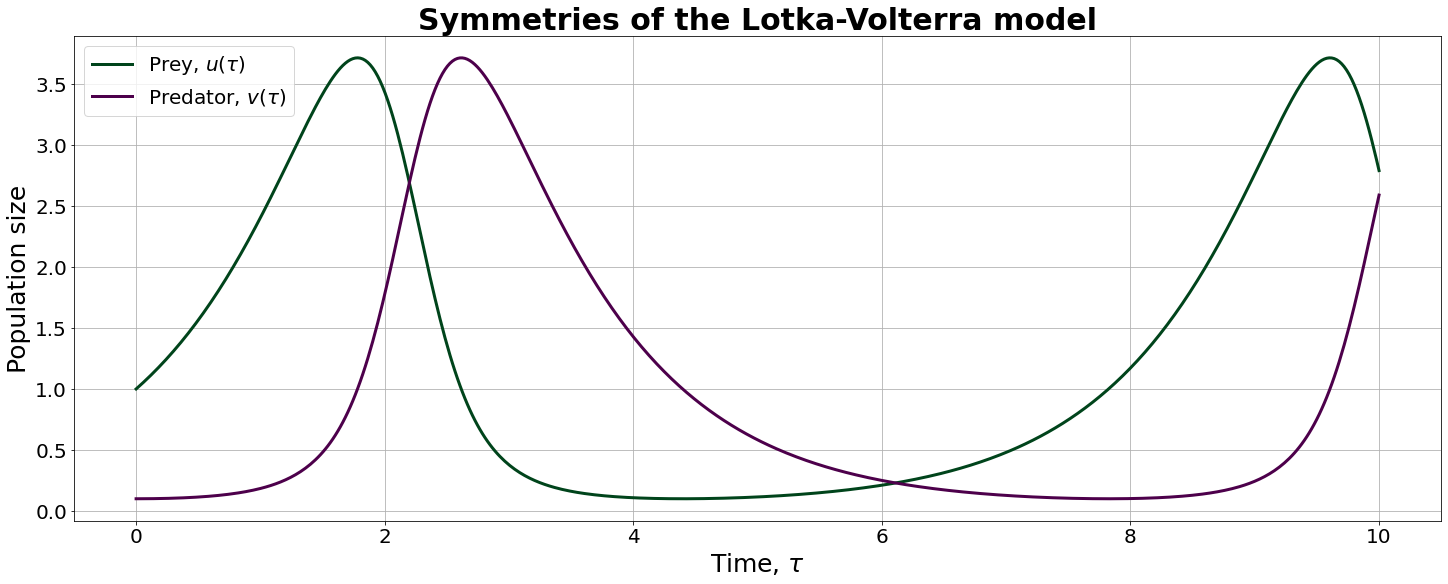

In [1]:
from numpy import * # For numerical calculations,
import matplotlib.pyplot as plt # For plotting,
from scipy import integrate # For solving ODEs.
# Function 1: ODE for the LV model
def dX_dt_LV(X, t=0,a=1):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ X[0]*(1-X[1]) ,
                   a*X[1]*(X[0]-1)])
# Define the time vector and the initial conditions
t = linspace(0, 10, 500)              # time
X0 = array([1, 0.10])                     # initials conditions: 10 rabbits and 5 foxes
# Define our parameter alpha
alpha = 1
# Solve the ODE at hand
X1, infodict = integrate.odeint(dX_dt_LV, X0, t, args = (alpha,),full_output=True)
infodict['message'] # >>> 'Integration successful.'
# Split the solution into its component parts
u, v = X1.T
# Plot our lovely solutions
fig_1 = plt.figure(constrained_layout=True, figsize=(20, 8))
plt.plot(t, u, '-', label="Prey, $u(\\tau)$" ,color=(0/256,68/256,27/256),linewidth=3.0)
plt.plot(t, v  , '-', label='Predator, $v(\\tau)$',color=(77/256,0/256,75/256),linewidth=3.0)
plt.grid()
plt.legend(loc='best',prop={"size":20})
plt.xlabel(xlabel='Time, $\\tau$',fontsize=25)
plt.ylabel(ylabel='Population size',fontsize=25)
# Change the size of the ticks
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
plt.title('Symmetries of the Lotka-Volterra model',fontsize=30,weight='bold')
plt.savefig('../Figures/LV_solutions.png')


### Plot the u-directional symmetry of the LV-model

/tmp/ipykernel_9333/3159857440.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  xi_u = quad(integrand_u, u_min, X[1], args=(X[1],X[2],alpha,branch_number))[0]


First point
[0.1002004  1.09435472 0.10046675]
Second point
[0.9253322  2.36494428 0.10046675]


/tmp/ipykernel_9333/3159857440.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  xi_u = quad(integrand_u, u_min, X[1], args=(X[1],X[2],alpha,branch_number))[0]


Text(0.5, 1.0, 'Symmetry $\\Gamma_{\\epsilon}^{\\mathrm{LV},u}$')

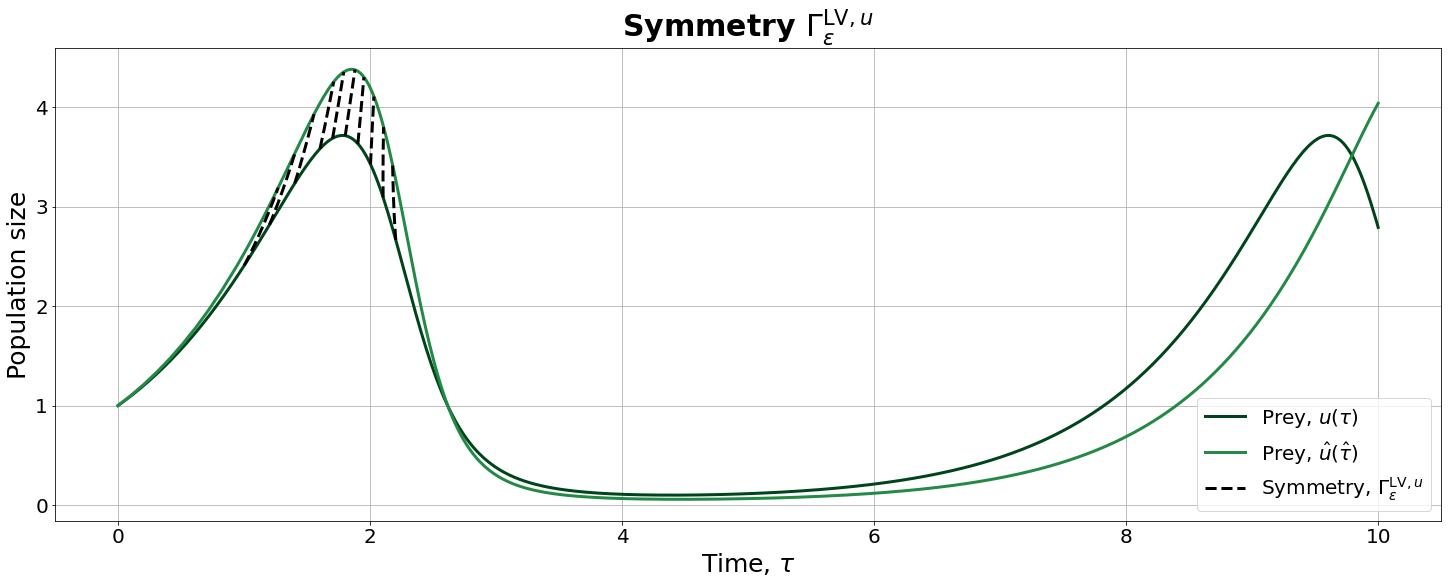

In [65]:
# Import the lambert W function from scipy
from scipy.special import lambertw
# Import quad so we can evaluate our integral as well
from scipy.integrate import quad
#===========================================================================================
# Function 2: For our tricky integrand
def integrand_u(s,u_val,v_val,alpha,branch_number):
    # Calculate the internal energy
    H = alpha*u_val+v_val - log((u_val**alpha)*v_val)
    # Define the invariant
    I_s = -((exp(s)/s)**(alpha))*(1/exp(H))
    # Calculate our main factor in the tangent which depends on the Lambert W function 
    factor = 1+lambertw(I_s,branch_number).real
    # Now we can define the denominator
    denom = factor*((s-1)**2)
    # Now, we can return the integral
    return -1/denom
# Function 3: ODE for the u-directional symmetry of the LV model
def dX_deps_LV_u(X, t=0,*parameters):
    # Extract the parameters
    alpha = parameters[0]
    branch_number = parameters[1]
    u_min = parameters[2]
    # Solve the integral for the time tangent
    xi_u = quad(integrand_u, u_min, X[1], args=(X[1],X[2],alpha,branch_number))[0]
    # Return the dynamics of the linear system
    return array([xi_u,
                  (1/alpha)*(X[1]/(X[1]-1)),
                 0])
#===========================================================================================
# Set the value of alpha
alpha = 1
# Epsilon value
epsilon = 0.5
# The transformation parameter
epsilon_vec = linspace(0,epsilon,200)              # epsilon
# We know that Lambertz w satisfies the following (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lambertw.html):
# The principal branch (k=0) is real if z>-1/e,
# The branch (k>1) is real if -1/e < z < 0.
# Let's make an experiment.
# Magical index
magical_index = 5
# Calculate the minimal u value
u_min = 1
# Take a point
X0 = array([t[magical_index], u[magical_index], v[magical_index]])
# Try to solve the ODE at hand
Gamma_epsilon, infodict = integrate.odeint(dX_deps_LV_u, X0, epsilon_vec, args = (alpha,0,u_min),full_output=True)
# Split the solution into its component parts
Gamma_u_t, Gamma_u_u, Gamma_u_v = Gamma_epsilon.T
# Define a new time vector 
t_2 = linspace(Gamma_u_t[-1], 10, 500)
# We need to integrate backwards in time as well to start at 0
t_2_start = linspace(Gamma_u_t[-1], 0, 10)
# Define new initial conditions for the transformed solutions
X02 = array([Gamma_u_t[-1], Gamma_u_u[-1], Gamma_u_v[-1]])  
X0_2 = array([Gamma_u_u[-1], Gamma_u_v[-1]])  
# Solve the ODE at hand with the new initial conditions
# Integrate backwards to get to 0
X2_start, infodict = integrate.odeint(dX_dt_LV, X0_2, t_2_start, args = (1,),full_output=True)
# Find the rest of the solution
X2, infodict = integrate.odeint(dX_dt_LV, X0_2, t_2, args = (1,),full_output=True)
#infodict['message'] # >>> 'Integration successful.'
# Split the solution into its component parts
u_2, v_2 = X2.T
# Split the start bit as well
u_2_start, v_2_start = X2_start.T
# Concatenate to get the full solution curves and the full time
u_2 = concatenate((flip(u_2_start,0), u_2), axis=0)
v_2 = concatenate((flip(v_2_start,0), v_2), axis=0)
t_2 = concatenate((flip(t_2_start,0), t_2), axis=0)
# Plot the symmetry again for some other point on the solution curves
magical_indices = [50, 60, 70, 80, 85, 90, 95, 100, 105, 110]
# The corresponding branches
branch_indices = [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1]
# Allocate memory for our lovely symmetry
Gamma_u_t_vec = []
Gamma_u_u_vec = []
# Loop over the indices and plot the symmetry transformation
for branch_index,new_magical_index in enumerate(magical_indices):
    # Take a point
    X0 = array([t[new_magical_index], u[new_magical_index], v[new_magical_index]])  
    # Try to solve the ODE at hand
    Gamma_epsilon_temp, infodict = integrate.odeint(dX_deps_LV_u, X0, epsilon_vec, args = (alpha,branch_indices[branch_index],u_min),full_output=True)    
    # Split the solution into its component parts
    Gamma_u_t_temp, Gamma_u_u_temp, Gamma_u_v_temp = Gamma_epsilon_temp.T    
    # Append our solutions
    Gamma_u_t_vec.append(Gamma_u_t_temp)    
    Gamma_u_u_vec.append(Gamma_u_u_temp)    
#=====================================================================================================
# Se if we can plot our symmetry?
fig_2 = plt.figure(constrained_layout=True, figsize=(20, 8))
# The original solution
plt.plot(t, u, '-', label="Prey, $u(\\tau)$" ,color=(0/256,68/256,27/256),linewidth=3.0)
# The transformed solution
plt.plot(t_2, u_2, '-', label="Prey, $\\hat{u}(\\hat{\\tau})$" ,color=(35/256,139/256,69/256),linewidth=3.0)
# The symmetry with legend
#plt.plot(Gamma_u_t,Gamma_u_u, '--', label="Symmetry, $\\Gamma_{\\epsilon}^{\\mathrm{LV},u}$" ,color=(0/256,0/256,0/256),linewidth=3.0)
# The symmetry without legend
for index in range(len(Gamma_u_t_vec)):
    if index == 0:
        plt.plot(Gamma_u_t_vec[index],Gamma_u_u_vec[index], '--', label="Symmetry, $\\Gamma_{\\epsilon}^{\\mathrm{LV},u}$" ,color=(0/256,0/256,0/256),linewidth=3.0)
    else:
        plt.plot(Gamma_u_t_vec[index],Gamma_u_u_vec[index], '--',color=(0/256,0/256,0/256),linewidth=3.0)
plt.grid()
plt.legend(loc='best',prop={"size":20})
plt.xlabel(xlabel='Time, $\\tau$',fontsize=25)
plt.ylabel(ylabel='Population size',fontsize=25)
# Change the size of the ticks
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
plt.title('Symmetry $\\Gamma_{\epsilon}^{\\mathrm{LV},u}$',fontsize=30,weight='bold')




### Plot the v-directional symmetry of the LV-model

3.714370959534782


/tmp/ipykernel_9333/3246372942.py:21: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  xi_v = quad(integrand_v, v_min, X[2], args=(X[1],X[2],alpha,branch_number))[0]


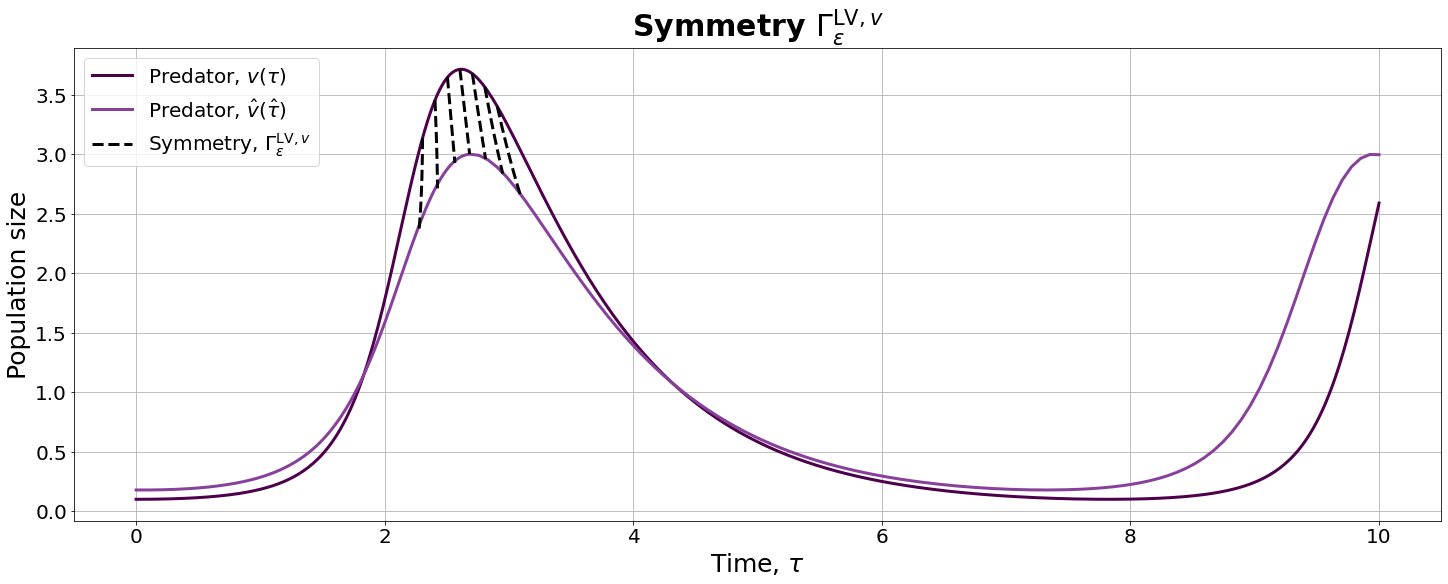

In [122]:
#===========================================================================================
# Function 4: For our tricky integrand
def integrand_v(s,u_val,v_val,alpha,branch_number):
    # Calculate the internal energy
    H = alpha*u_val+v_val - log((u_val**alpha)*v_val)
    # Define the invariant
    I_s = -(1/alpha)*(((exp(s-H))/(alpha*s))**(1/alpha))
    # Calculate our main factor in the tangent which depends on the Lambert W function 
    factor = 1+lambertw(I_s,branch_number).real
    # Now we can define the denominator
    denom = factor*((1-s)**2)
    # Now, we can return the integral
    return -1/denom
# Function 5: ODE for the v-directional symmetry of the LV model
def dX_deps_LV_v(X, t=0,*parameters):
    # Extract the parameters
    alpha = parameters[0]
    branch_number = parameters[1]
    v_min = parameters[2]
    # Solve the integral for the time tangent
    xi_v = quad(integrand_v, v_min, X[2], args=(X[1],X[2],alpha,branch_number))[0]
    # Return the dynamics of the linear system
    return array([xi_v,
                  0,
                 ((X[2])/(1-X[2]))])
#===========================================================================================
# Epsilon value
epsilon = 0.5
# The transformation parameter
epsilon_vec = linspace(0,epsilon,200)              # epsilon
# Magical index
magical_index = 130
# Print the value of v
print(v[magical_index])
# Take a point
X0 = array([t[magical_index], u[magical_index], v[magical_index]])
# Define the minimal u value
v_min = 1
# Try to solve the ODE at hand
Gamma_epsilon, infodict = integrate.odeint(dX_deps_LV_v, X0, epsilon_vec, args = (alpha,0,v_min),full_output=True)
# Split the solution into its component parts
Gamma_v_t, Gamma_v_u, Gamma_v_v = Gamma_epsilon.T
# Define a new time vector 
t_2 = linspace(Gamma_v_t[-1], 10, 100)
# We need to integrate backwards in time as well to start at 0
t_2_start = linspace(Gamma_v_t[-1], 0, 400)
# Define new initial conditions for the transformed solutions
X02 = array([Gamma_v_t[-1], Gamma_v_u[-1], Gamma_v_v[-1]])  
X0_2 = array([Gamma_v_u[-1], Gamma_v_v[-1]])  
# Solve the ODE at hand with the new initial conditions
# Integrate backwards to get to 0
X2_start, infodict = integrate.odeint(dX_dt_LV, X0_2, t_2_start, args = (1,),full_output=True)
# Find the rest of the solution
X2, infodict = integrate.odeint(dX_dt_LV, X0_2, t_2, args = (1,),full_output=True)
#infodict['message'] # >>> 'Integration successful.'
# Split the solution into its component parts
u_2, v_2 = X2.T
# Split the start bit as well
u_2_start, v_2_start = X2_start.T
# Concatenate to get the full solution curves and the full time
u_2 = concatenate((flip(u_2_start,0), u_2), axis=0)
v_2 = concatenate((flip(v_2_start,0), v_2), axis=0)
t_2 = concatenate((flip(t_2_start,0), t_2), axis=0)
# Plot the symmetry again for some other point on the solution curves
magical_indices = [magical_index-15,magical_index-10,magical_index-5,magical_index,magical_index+5,magical_index+10,magical_index+15]
# The corresponding branches
branch_indices = [-1,-1,-1,0,0,0,0,0]
# Allocate memory for our lovely symmetry
Gamma_v_t_vec = []
Gamma_v_v_vec = []
# Loop over the indices and plot the symmetry transformation
for branch_index,new_magical_index in enumerate(magical_indices):
    # Take a point
    X0 = array([t[new_magical_index], u[new_magical_index], v[new_magical_index]])  
    # Try to solve the ODE at hand
    Gamma_epsilon_temp, infodict = integrate.odeint(dX_deps_LV_v, X0, epsilon_vec, args = (alpha,branch_indices[branch_index],v_min),full_output=True)    
    # Split the solution into its component parts
    Gamma_v_t_temp, Gamma_v_u_temp, Gamma_v_v_temp = Gamma_epsilon_temp.T    
    # Append our solutions
    Gamma_v_t_vec.append(Gamma_v_t_temp)    
    Gamma_v_v_vec.append(Gamma_v_v_temp)  
#=====================================================================================================
# Se if we can plot our symmetry?
fig_3 = plt.figure(constrained_layout=True, figsize=(20, 8))
# The original solution
plt.plot(t, v, '-', label="Predator, $v(\\tau)$" ,color=(77/256,0/256,75/256),linewidth=3.0)
# The transformed solution
plt.plot(t_2, v_2, '-', label="Predator, $\\hat{v}(\\hat{\\tau})$" ,color=(136/256,65/256,157/256),linewidth=3.0)
# Plot the symmetry
for index in range(len(Gamma_v_t_vec)):
    if index == 0:
        plt.plot(Gamma_v_t_vec[index],Gamma_v_v_vec[index], '--', label="Symmetry, $\\Gamma_{\\epsilon}^{\\mathrm{LV},v}$" ,color=(0/256,0/256,0/256),linewidth=3.0)
    else:
        plt.plot(Gamma_v_t_vec[index],Gamma_v_v_vec[index], '--',color=(0/256,0/256,0/256),linewidth=3.0)
plt.grid()
plt.legend(loc='best',prop={"size":20})
plt.xlabel(xlabel='Time, $\\tau$',fontsize=25)
plt.ylabel(ylabel='Population size',fontsize=25)
# Change the size of the ticks
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
plt.title('Symmetry $\\Gamma_{\epsilon}^{\\mathrm{LV},v}$',fontsize=30,weight='bold')
plt.show()